In [1]:
import numpy as np
import pandas as pd        
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 

C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\2736211122.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1 Training Data Preparation 

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858


In [3]:
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,...,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.0,5807.000000
mean,2903.000000,0.034097,0.505416,0.558893,0.553852,0.607958,0.607938,0.998726,0.797192,0.809081,...,0.807956,1.803513e+07,0.624030,0.607956,0.840407,0.280324,0.027446,0.565267,1.0,0.047736
std,1676.480838,0.181493,0.060808,0.065650,0.061613,0.017499,0.017480,0.014087,0.013731,0.014553,...,0.039062,3.706013e+08,0.009625,0.017499,0.015447,0.014511,0.011134,0.011678,0.0,0.049046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.224792,1.015560e-04,0.419045,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1451.500000,0.000000,0.476673,0.535679,0.527437,0.600448,0.600427,0.998969,0.797386,0.809312,...,0.796843,9.038045e-04,0.623634,0.600448,0.840121,0.276916,0.026791,0.565158,1.0,0.024395
50%,2903.000000,0.000000,0.503096,0.559911,0.552492,0.605969,0.605933,0.999022,0.797464,0.809376,...,0.810710,2.108343e-03,0.623879,0.605967,0.841176,0.278801,0.026808,0.565253,1.0,0.033687
75%,4354.500000,0.000000,0.535417,0.589212,0.583998,0.613856,0.613730,0.999094,0.797579,0.809469,...,0.826544,5.328774e-03,0.624169,0.613857,0.842352,0.281487,0.026914,0.565729,1.0,0.053393
max,5806.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,0.540672,0.736985,1.0,0.920638


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

In [5]:
df = df.drop(['Index'], axis=1) # removing the index column

In [6]:
df.shape

(5807, 96)

In [7]:
if df.isnull().values.any(): # checking for missing values
    print('Columns with missing values: ', df.columns[df.isnull().any()])
else :
    print('No missing values found')

No missing values found


In [8]:
# splitting data into X and y 
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

### 1.2 Confirm features non-linearity 

In [9]:
# check non linearity with spearman correlation and return the p-value and give me the number of columns that are non linear

def identify_non_linear_features(X, y, threshold):
    non_linear_features = []
    for column in X.columns:
        spearman_corr, p_value = stats.spearmanr(X[column], y)
        if abs(spearman_corr) < threshold:
            non_linear_features.append(column)
    return non_linear_features

non_linear_features = identify_non_linear_features(X,y,0.9)
print("Number of non linear features: ",len(non_linear_features))

linear_features = [x for x in X.columns if x not in non_linear_features]
print("Linear features: ",linear_features)

Number of non linear features:  94
Linear features:  [' Net Income Flag']


C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\1929637422.py:6: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  spearman_corr, p_value = stats.spearmanr(X[column], y)
C:\Users\natnj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


'Net Income Flag' feature is dropped from dataset for linearity

In [10]:
X = X.drop(linear_features, axis=1)
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,...,0,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,0.032464
1,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,0.303553,0.781665,...,0,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,0.032442
2,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,0.303582,0.781813,...,0,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,0.033034
3,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,0.303506,0.781633,...,0,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,0.015406
4,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,0.303468,0.781614,...,0,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,0.028858


### 1.3 Correlation Analysis

In [11]:
def remove_high_correlation_features(X, threshold):
    correlation = X.corr()
    upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

high_correlation_features = remove_high_correlation_features(X, 0.95)
print("Number of high correlation features: ", len(high_correlation_features))

Number of high correlation features:  16


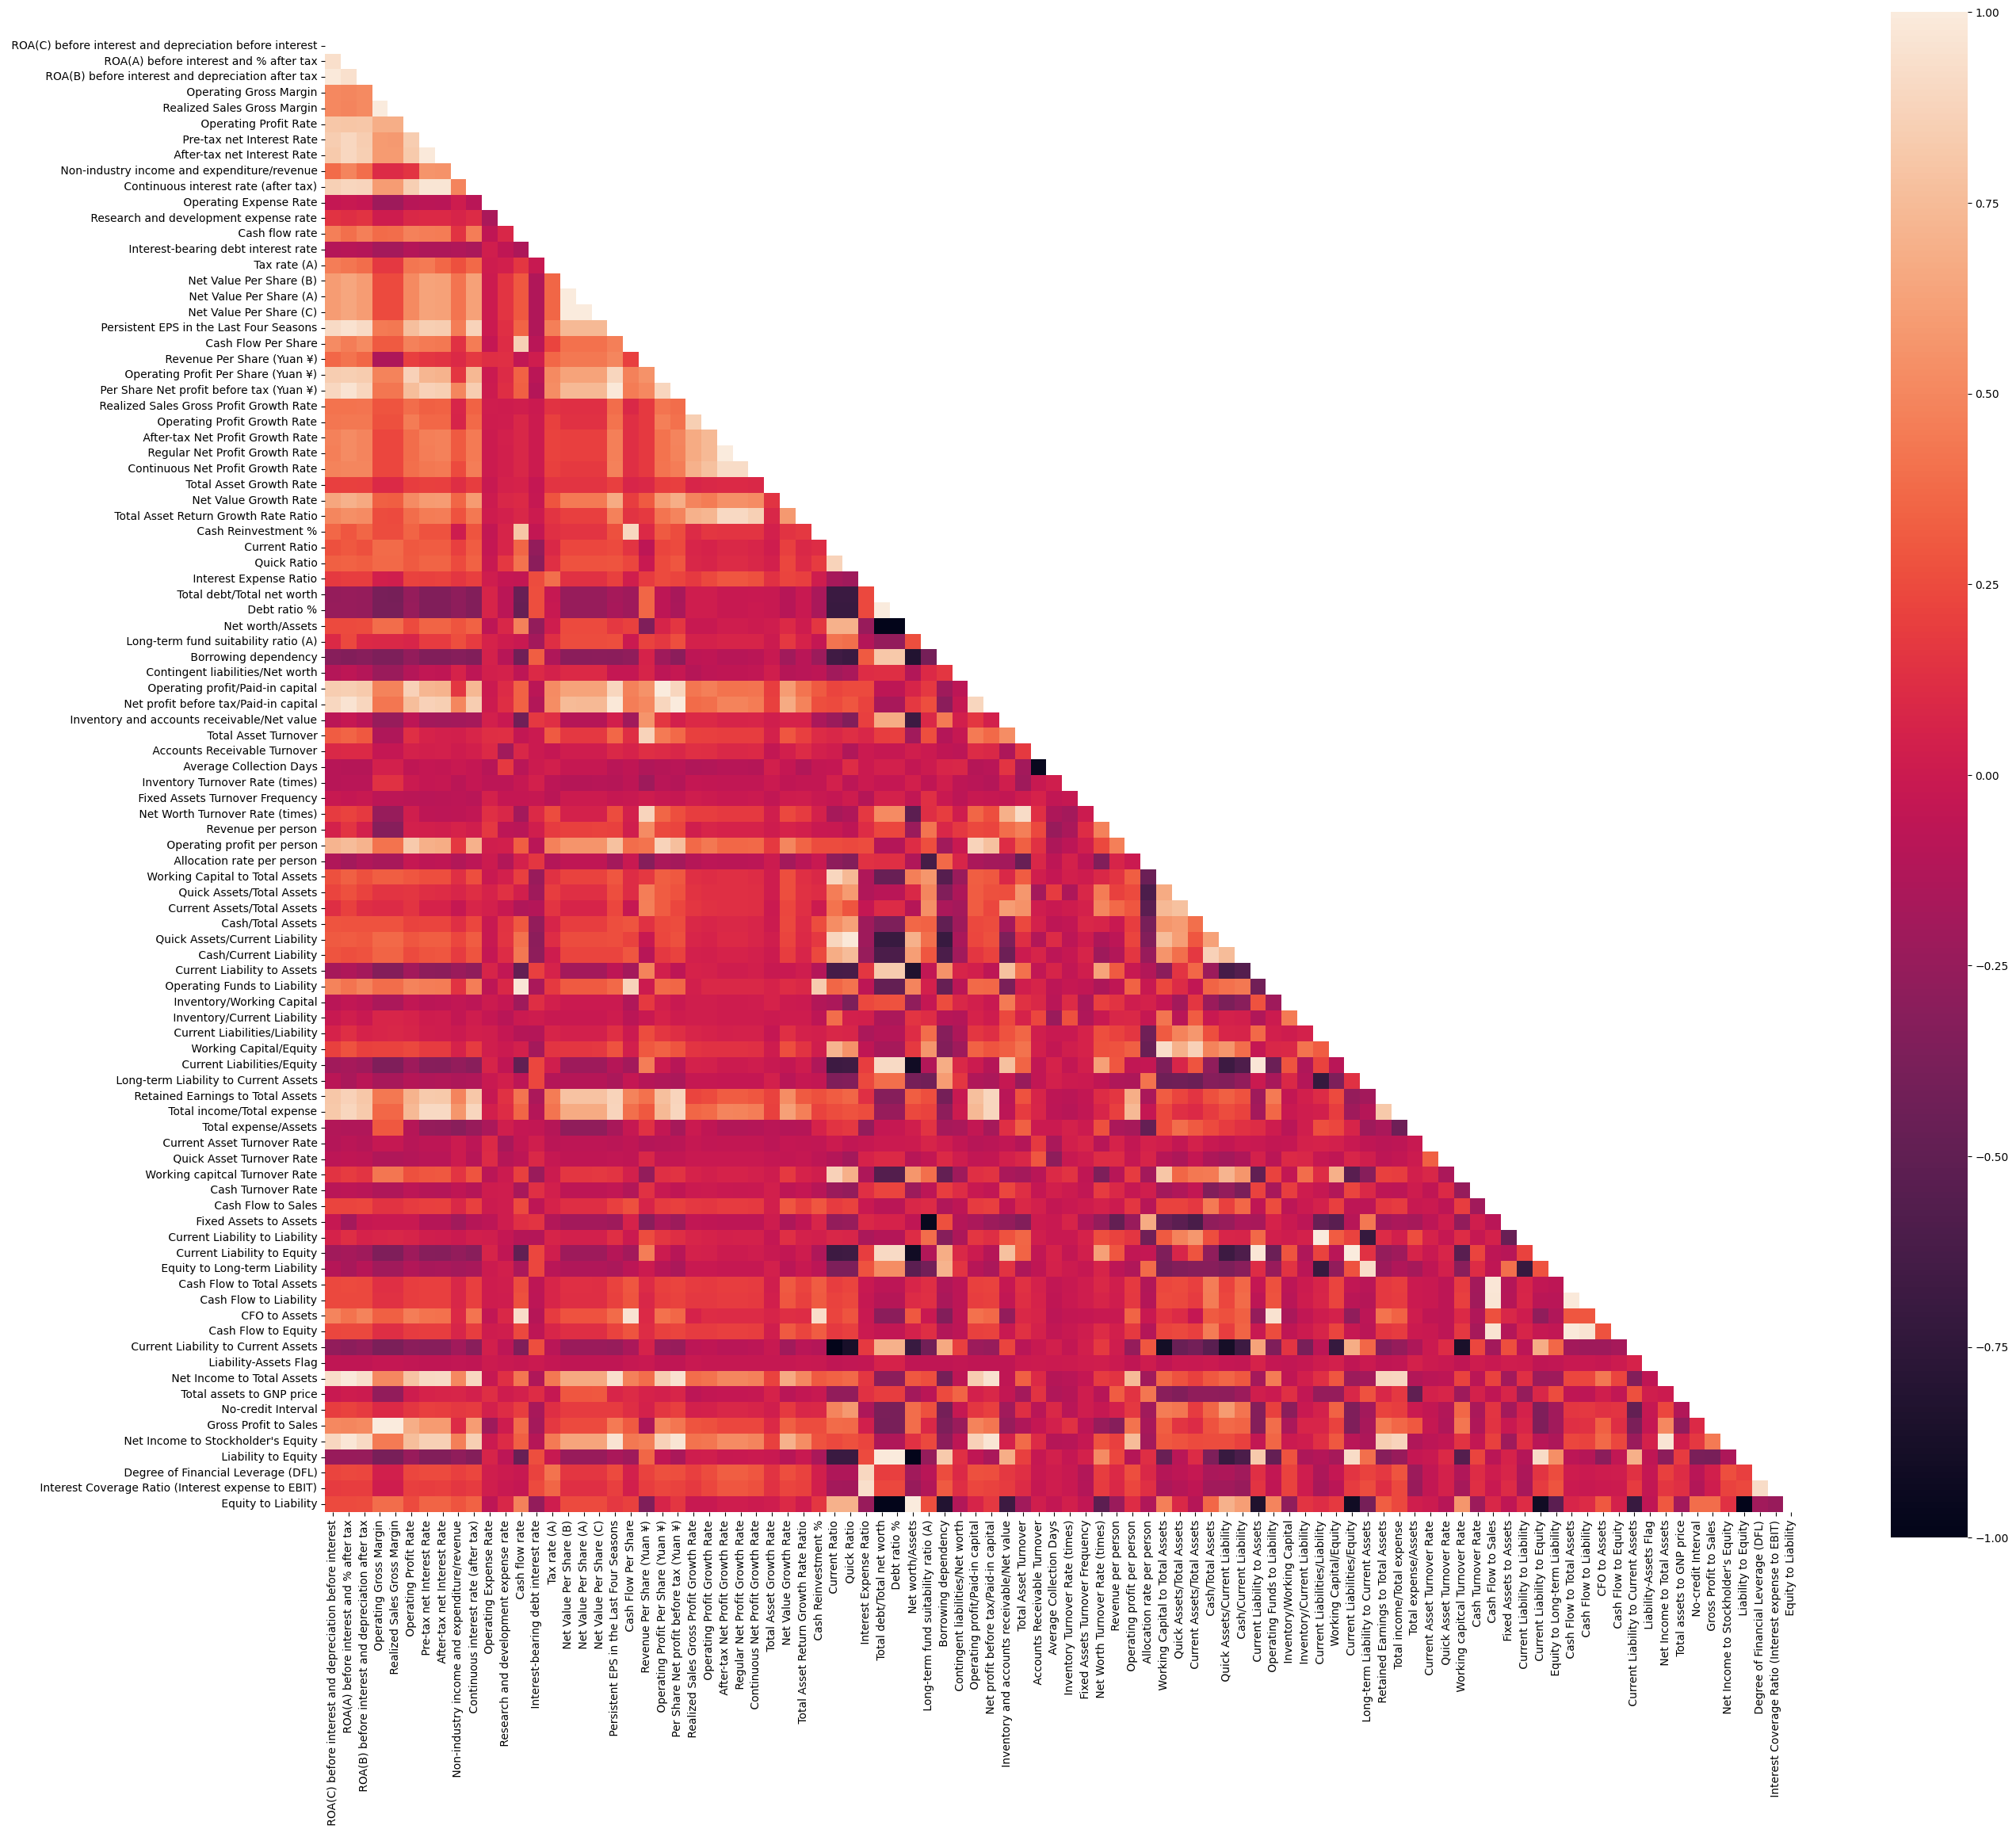

In [12]:
f, ax = plt.subplots(figsize=(30, 25))
correlation = X.corr('spearman')
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask= mask, vmax=1, square=True)
plt.show()

There are 16 features which are highly correlated with other features and need to remove from the dataset

In [13]:
X = X.drop(high_correlation_features, axis=1)
X.shape

(5807, 78)

Histogram of the Numerical data 

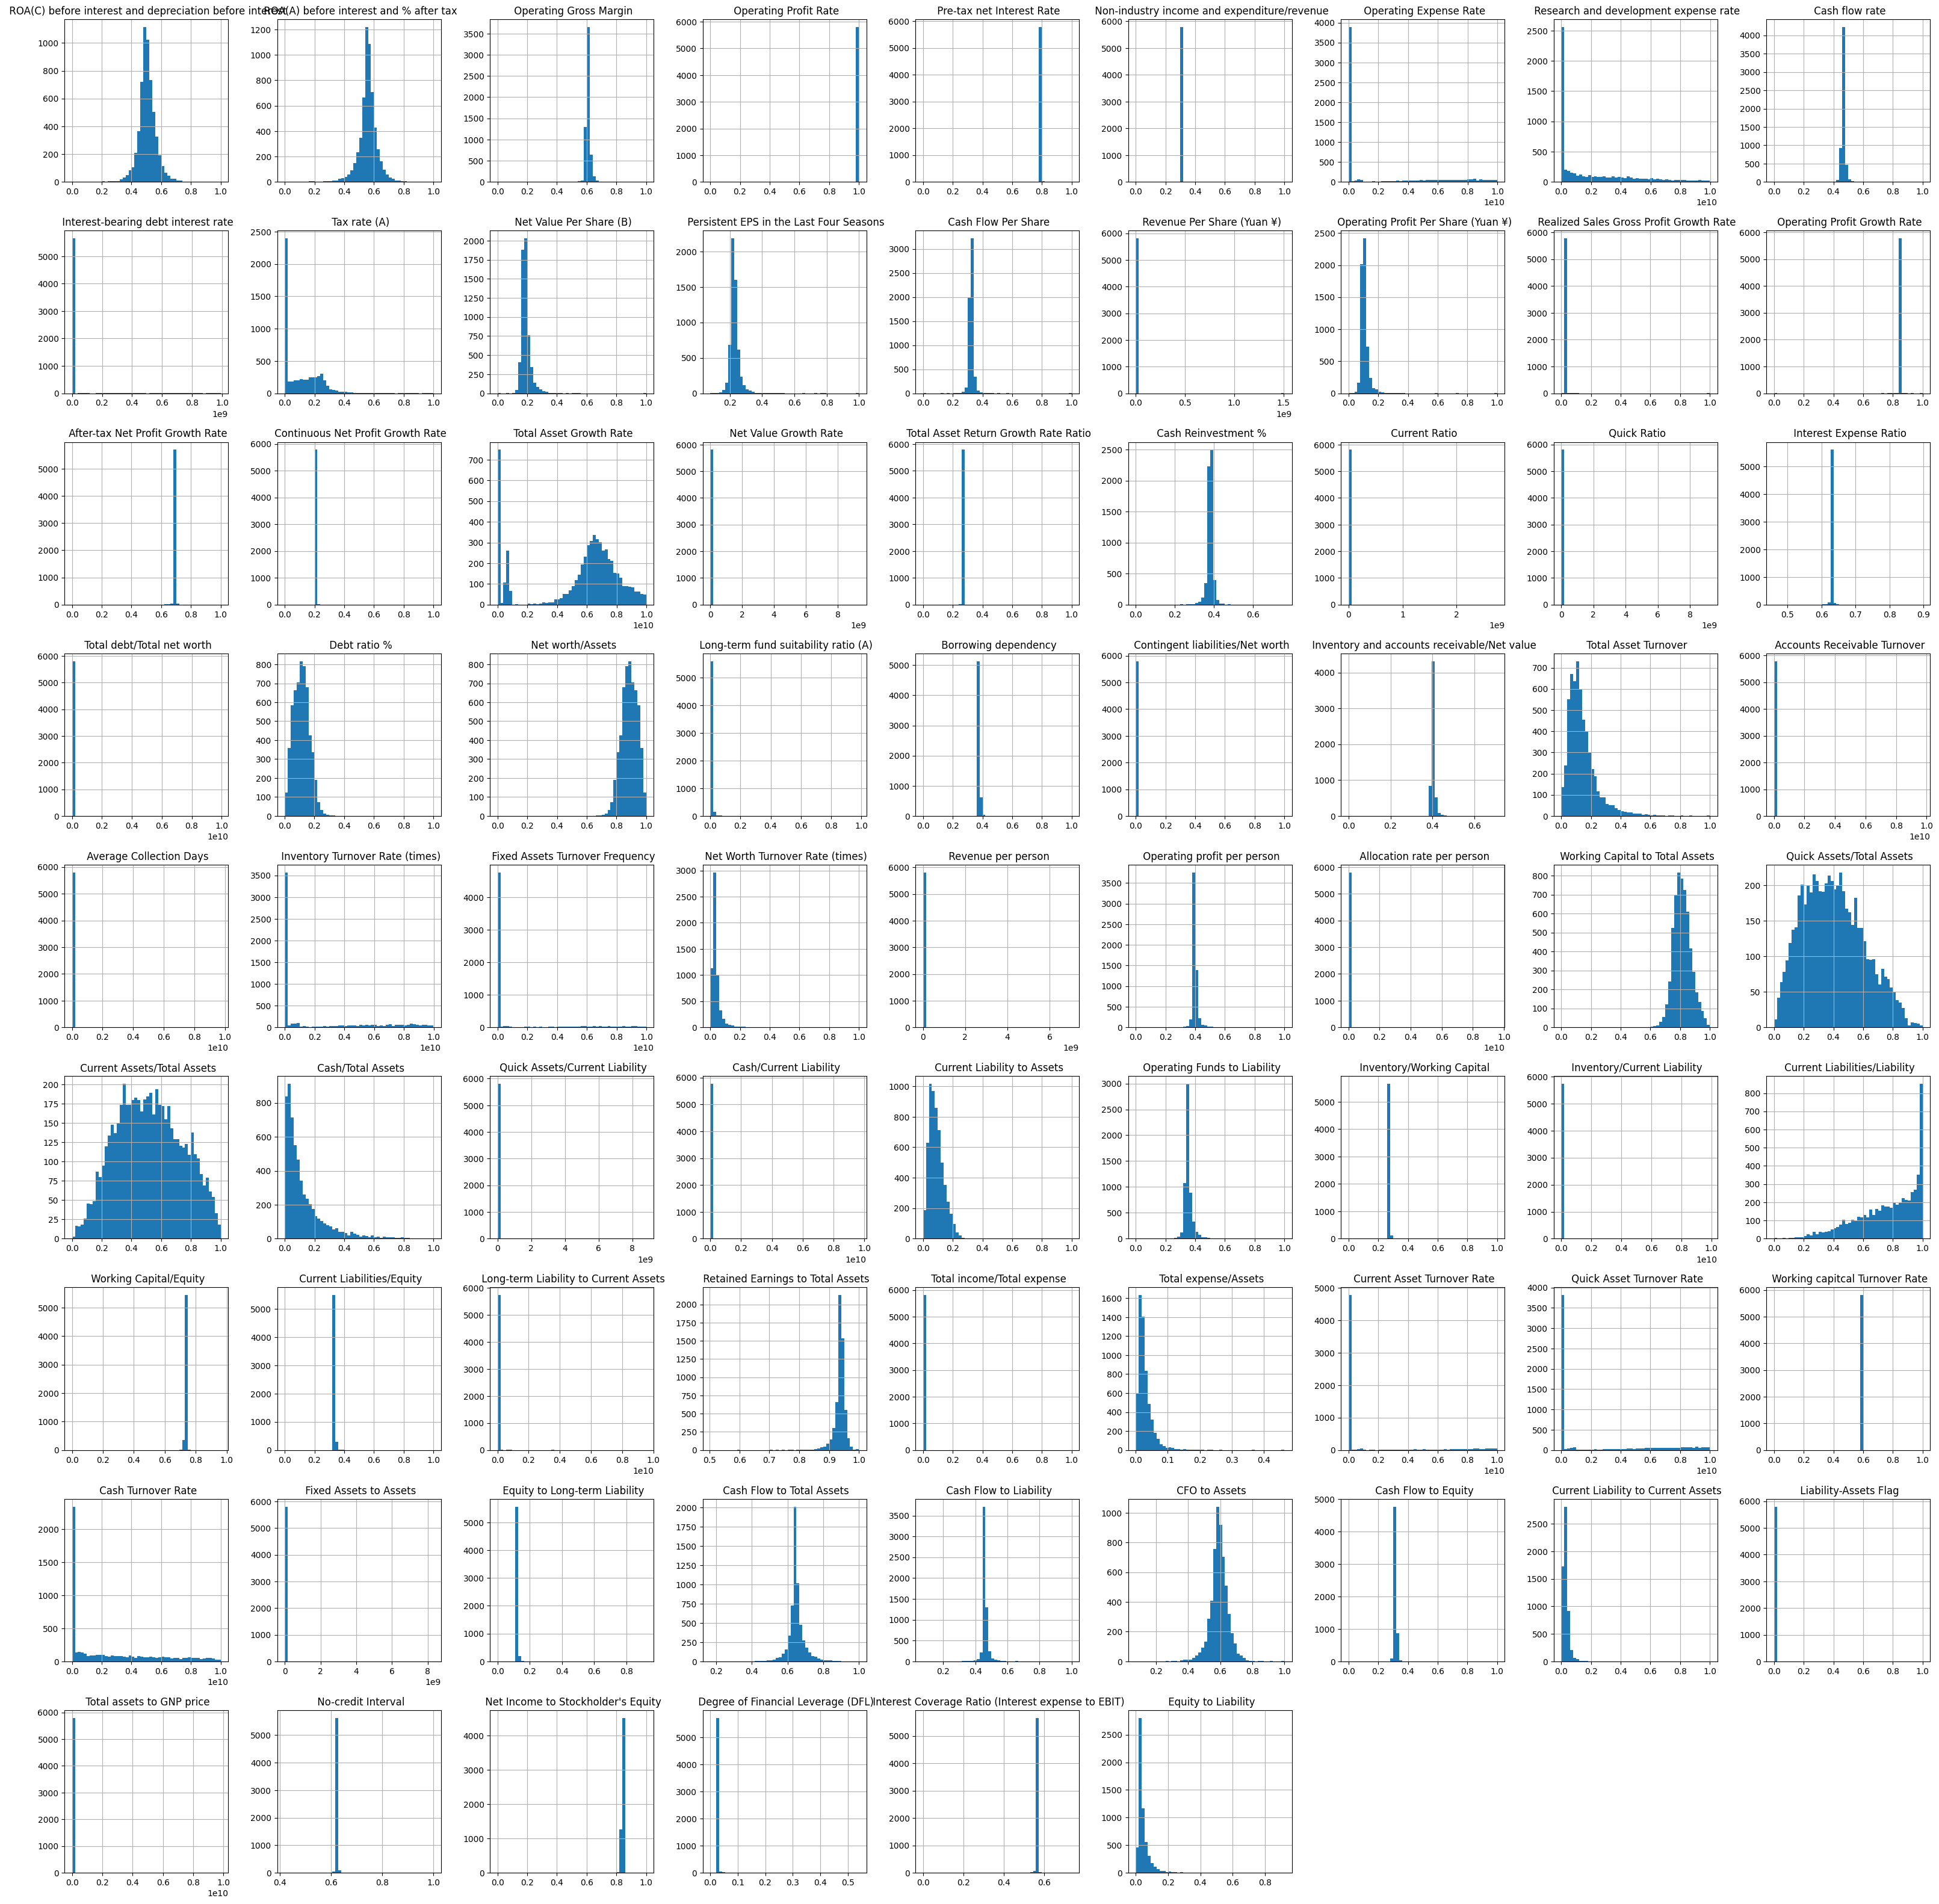

In [14]:
X.hist(bins=50, figsize=(40,40))
plt.show()

As per the histogram we can see that there are outliers in the data, we used capping method, this method is used to cap the outliers to the 97th percentile and 25th percentile and help us not to remove the valuable data from the dataset 

In [15]:
# outlier capping
def cap_outliers(X):
    for column in X.columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X[column] = np.where(X[column] < lower_bound, lower_bound, X[column])
        X[column] = np.where(X[column] > upper_bound, upper_bound, X[column])
    return X

X = cap_outliers(X)

As you can see, features are not normally distributed. We will use the yeo-johnson transformation to make them normally distributed.

In [16]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
XX = pt.fit_transform(X)
X = pd.DataFrame(XX, columns=X.columns)

C:\Users\natnj\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [17]:
non_linear_features = identify_non_linear_features(X,y,0.5)
print("Number of non linear features: ",len(non_linear_features))

Number of non linear features:  77


C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\1929637422.py:6: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  spearman_corr, p_value = stats.spearmanr(X[column], y)
C:\Users\natnj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


There is one more linear feature after transformation so we remove it.

In [18]:
linear_features = [x for x in X.columns if x not in non_linear_features]
print("Linear features: ",linear_features)

Linear features:  [' Liability-Assets Flag']


In [19]:
X = X.drop(linear_features, axis=1)
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-1.083233,-1.131233,-1.313050,-1.422473e-15,-0.929961,-0.295498,1.424170,-1.203546,-0.426286,0.302882,...,0.498104,-0.477884,0.598850,0.165816,0.745382,-0.461558,-1.072959,-1.084202e-19,-6.938894e-18,-0.224195
1,0.482929,0.242089,-0.117531,3.608225e-16,0.222847,0.217222,-0.710177,0.523417,-0.169528,-0.900902,...,0.174541,0.021551,0.229482,-0.118334,0.984372,0.507076,0.354746,0.000000e+00,-5.204170e-18,-0.225580
2,1.270044,1.194677,0.496948,1.578598e-15,0.987093,0.451897,-0.710176,0.926610,0.756132,-0.325736,...,1.207229,0.747394,1.375721,-0.672803,0.995374,1.954909,1.109394,0.000000e+00,-3.469447e-18,-0.188340
3,-0.426796,-0.082400,-0.446595,9.367507e-17,-0.065003,-0.159452,1.422553,-1.203546,-1.880566,-0.290201,...,0.014086,-2.310042,0.681127,0.464381,-0.206906,-1.900890,0.366202,1.084202e-19,2.081668e-17,-1.598345
4,0.101841,-0.470103,-0.703514,-2.116363e-16,-0.342679,-0.458846,1.417704,0.836038,-0.486548,0.284212,...,-0.831500,-0.414335,-1.065510,0.269734,-0.750812,0.184892,-0.411474,0.000000e+00,3.469447e-18,-0.464165


### 1.4 Confirming normality of each feature

In [20]:
def check_normality(X):
    normality = []
    for column in X.columns:
        _, p_value = stats.normaltest(X[column])
        if p_value < 0.05:
            normality.append(column)
    return normality

non_normal_features = check_normality(X)
print("Number of non normal features: ",len(non_normal_features))

Number of non normal features:  52


C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\136652326.py:4: DeprecationWarning: Please use `normaltest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  _, p_value = stats.normaltest(X[column])


After transformation we checked the normality and out of 77 features, there are 52 non normal features

In [21]:
# performing standardization
from sklearn. preprocessing import StandardScaler  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
# performing feature selection, using random forest to select most important features

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Using Random Forest to find the feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', bootstrap=True)
rf.fit(X_scaled , y)

# Selecting features based on feature importance
sfm = SelectFromModel(rf, threshold= "mean")
sfm.fit(X_scaled, y)

# Features selected by Random Forest
selected_features_rf = X_scaled.columns[sfm.get_support()]
print("Selected features by Random Forest:")
print(selected_features_rf)

Selected features by Random Forest:
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax', ' Pre-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Net Income to Stockholder's Equity',
       ' Equity to Liability'],
      dtype='object')


In [23]:
X_selected = X_scaled[selected_features_rf]
print(X_selected)
X_selected = pd.DataFrame(X_selected, columns=selected_features_rf)

      ROA(C) before interest and depreciation before interest  \
0                                             -1.083233         
1                                              0.482929         
2                                              1.270044         
3                                             -0.426796         
4                                              0.101841         
...                                                 ...         
5802                                           0.045758         
5803                                           0.939824         
5804                                          -0.264531         
5805                                           0.165438         
5806                                           0.633277         

      ROA(A) before interest and % after tax  Pre-tax net Interest Rate  \
0                                  -1.131233                  -0.929961   
1                                   0.242089                   0.2228

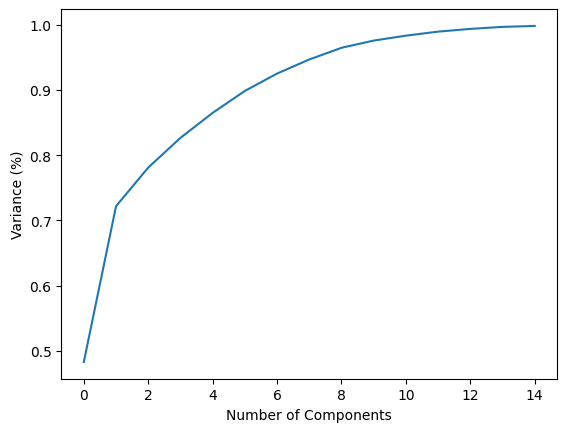

In [24]:
#apply pca with 50 components and get the explained variance ratio and draw a plot
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)
X_pca = pca.fit_transform(X_selected)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [25]:
# get the number of components that explain 95% of the variance
n_components = np.argmax(np.cumsum(explained_variance) > 0.95) + 1
print("Number of components: ",n_components)

Number of components:  9


In [26]:
pca = PCA(n_components=9, random_state=42)
X_pca = pca.fit_transform(X_selected)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 10)])
X_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.658210,-1.400730,-0.381088,0.452337,0.858035,-0.012784,-0.381166,0.117564,0.221323
1,-1.428676,0.461506,-1.030601,-0.234852,-0.029953,-0.033227,-0.566027,0.076135,0.440510
2,-2.775424,1.442919,-0.711948,0.144689,-0.152528,0.164080,0.258936,-0.555779,-0.286176
3,2.403655,4.045684,0.326334,-1.356795,-0.638412,-0.146502,-0.058012,0.546713,-0.348422
4,0.865429,0.283041,0.526507,-0.195726,-0.437119,-0.979682,-0.145639,-0.450059,0.824183


In [27]:
X = pd.DataFrame(X_pca)
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.658210,-1.400730,-0.381088,0.452337,0.858035,-0.012784,-0.381166,0.117564,0.221323
1,-1.428676,0.461506,-1.030601,-0.234852,-0.029953,-0.033227,-0.566027,0.076135,0.440510
2,-2.775424,1.442919,-0.711948,0.144689,-0.152528,0.164080,0.258936,-0.555779,-0.286176
3,2.403655,4.045684,0.326334,-1.356795,-0.638412,-0.146502,-0.058012,0.546713,-0.348422
4,0.865429,0.283041,0.526507,-0.195726,-0.437119,-0.979682,-0.145639,-0.450059,0.824183


# 2 Company Characterization

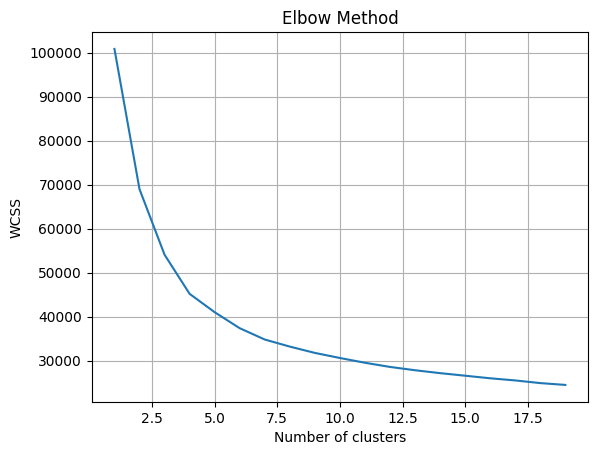

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=10, random_state=123 )
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)
X_pca['Cluster'] = clusters

In [30]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Cluster
0,2.658210,-1.400730,-0.381088,0.452337,0.858035,-0.012784,-0.381166,0.117564,0.221323,1
1,-1.428676,0.461506,-1.030601,-0.234852,-0.029953,-0.033227,-0.566027,0.076135,0.440510,5
2,-2.775424,1.442919,-0.711948,0.144689,-0.152528,0.164080,0.258936,-0.555779,-0.286176,5
3,2.403655,4.045684,0.326334,-1.356795,-0.638412,-0.146502,-0.058012,0.546713,-0.348422,0
4,0.865429,0.283041,0.526507,-0.195726,-0.437119,-0.979682,-0.145639,-0.450059,0.824183,0


In [31]:
df_new = pd.concat([X_pca, y], axis=1)
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Cluster,Bankrupt?
0,2.658210,-1.400730,-0.381088,0.452337,0.858035,-0.012784,-0.381166,0.117564,0.221323,1,0
1,-1.428676,0.461506,-1.030601,-0.234852,-0.029953,-0.033227,-0.566027,0.076135,0.440510,5,0
2,-2.775424,1.442919,-0.711948,0.144689,-0.152528,0.164080,0.258936,-0.555779,-0.286176,5,0
3,2.403655,4.045684,0.326334,-1.356795,-0.638412,-0.146502,-0.058012,0.546713,-0.348422,0,0
4,0.865429,0.283041,0.526507,-0.195726,-0.437119,-0.979682,-0.145639,-0.450059,0.824183,0,0


In [32]:
df_new.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Cluster,Bankrupt?
count,5807.000000,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5807.000000
mean,0.000000,-1.101237e-17,2.569554e-17,1.040057e-17,3.058992e-17,-7.953380e-18,2.233064e-17,9.788775e-18,-2.416604e-17,2.491820,0.034097
std,2.949608,2.072557e+00,1.031996e+00,9.051495e-01,8.303649e-01,7.779502e-01,6.921207e-01,6.230401e-01,5.674797e-01,1.792805,0.181493
min,-7.816786,-6.623673e+00,-2.569227e+00,-2.853527e+00,-2.930363e+00,-3.142855e+00,-3.160608e+00,-2.871880e+00,-1.691001e+00,0.000000,0.000000
25%,-2.001595,-1.329113e+00,-7.690778e-01,-6.506913e-01,-5.785876e-01,-4.833022e-01,-3.955402e-01,-3.947488e-01,-3.375186e-01,1.000000,0.000000
50%,-0.085409,1.419971e-01,-1.236481e-01,-7.661265e-02,-7.586482e-02,-4.909506e-02,4.370988e-02,-2.983971e-02,-2.840695e-02,2.000000,0.000000
75%,1.766543,1.423063e+00,7.883676e-01,5.668594e-01,5.699721e-01,4.412741e-01,4.254520e-01,3.809683e-01,2.855697e-01,4.000000,0.000000
max,8.760172,6.779028e+00,3.916567e+00,2.954308e+00,3.033913e+00,4.202044e+00,4.574788e+00,2.979908e+00,7.447887e+00,5.000000,1.000000


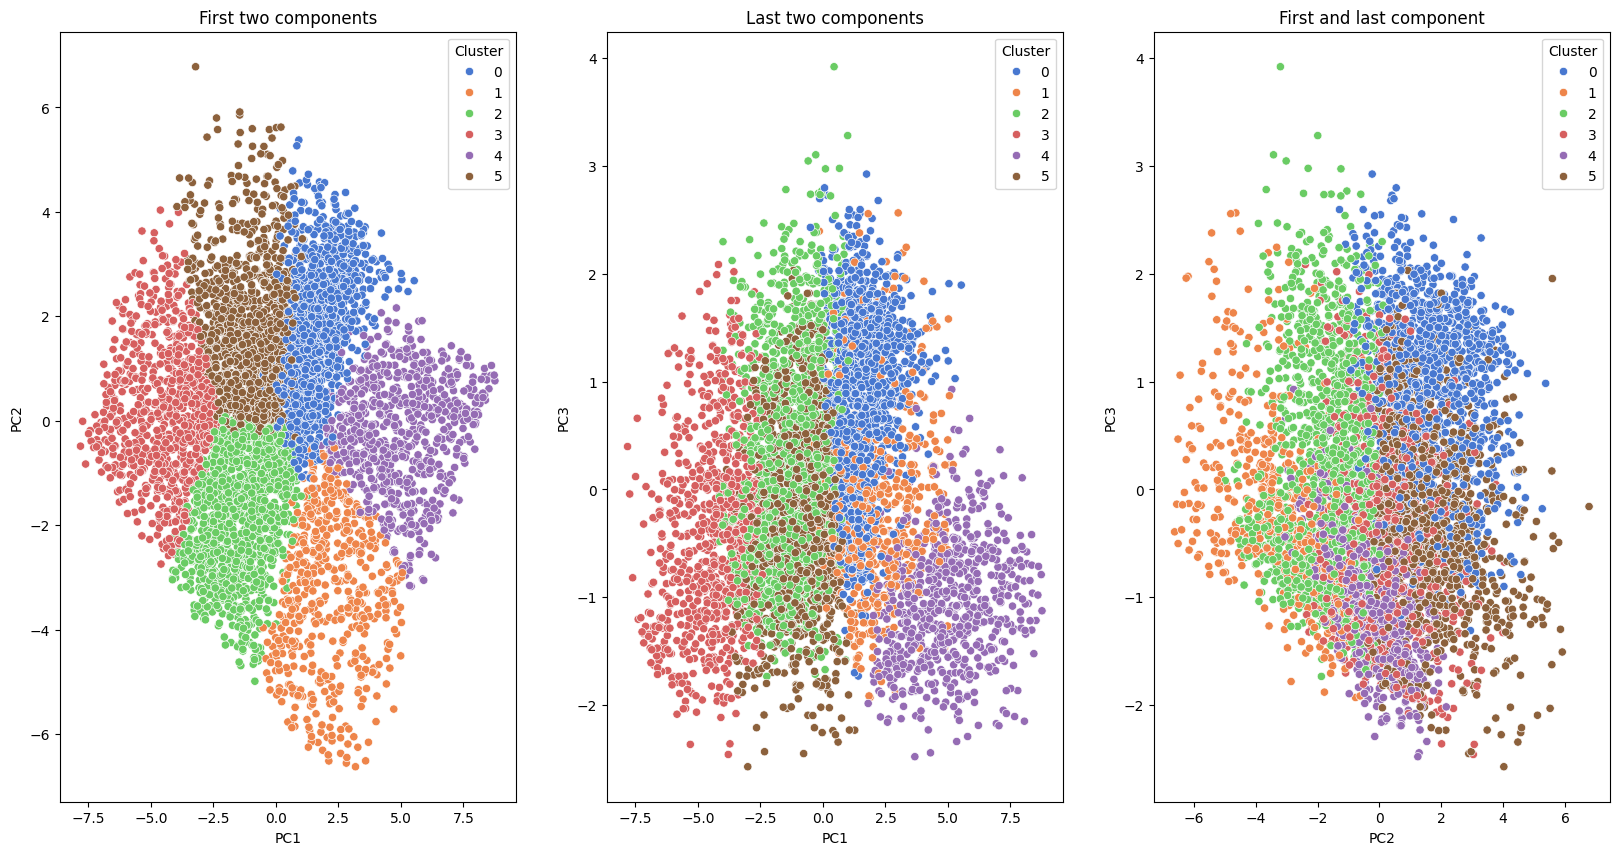

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_new, x='PC1', y='PC2', hue='Cluster', palette='muted')
plt.title('First two components')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_new, x='PC1', y='PC3', hue='Cluster', palette='muted')
plt.title('Last two components')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_new, x='PC2', y='PC3', hue='Cluster', palette='muted')
plt.title('First and last component')

plt.show()


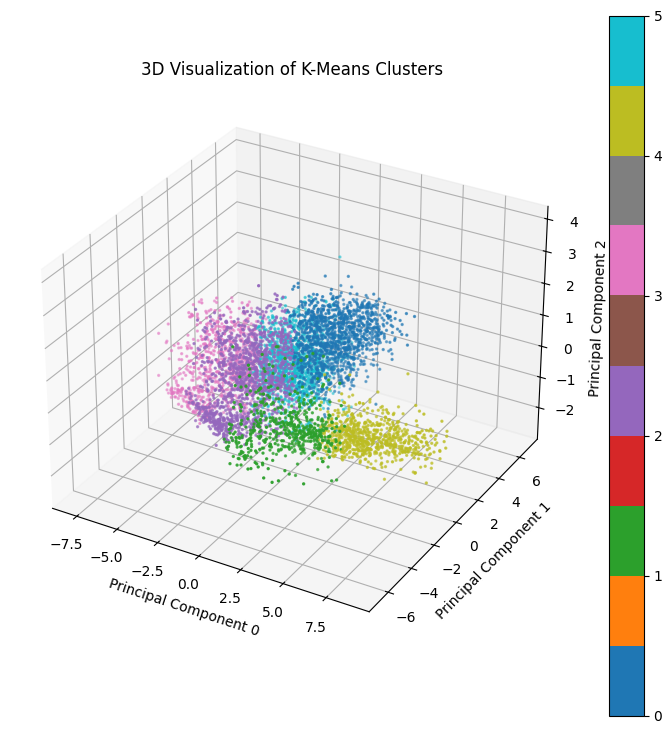

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(222, projection='3d')

scatter = ax.scatter(df_new['PC1'], df_new['PC2'], df_new['PC3'], 
                     c=clusters, marker='o', s = 2,  cmap='tab10')

ax.set_xlabel('Principal Component 0')
ax.set_ylabel('Principal Component 1')
ax.set_zlabel('Principal Component 2')

ax.set_title('3D Visualization of K-Means Clusters')
plt.colorbar(scatter)
plt.show()


C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\1815974130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Cluster', y=f'PC{i}', palette='muted')
C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\1815974130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Cluster', y=f'PC{i}', palette='muted')
C:\Users\natnj\AppData\Local\Temp\ipykernel_27016\1815974130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Cluster', y=f'PC{i}', palette='muted')
C:\Users\natnj\AppData\Local\Temp\ipykernel

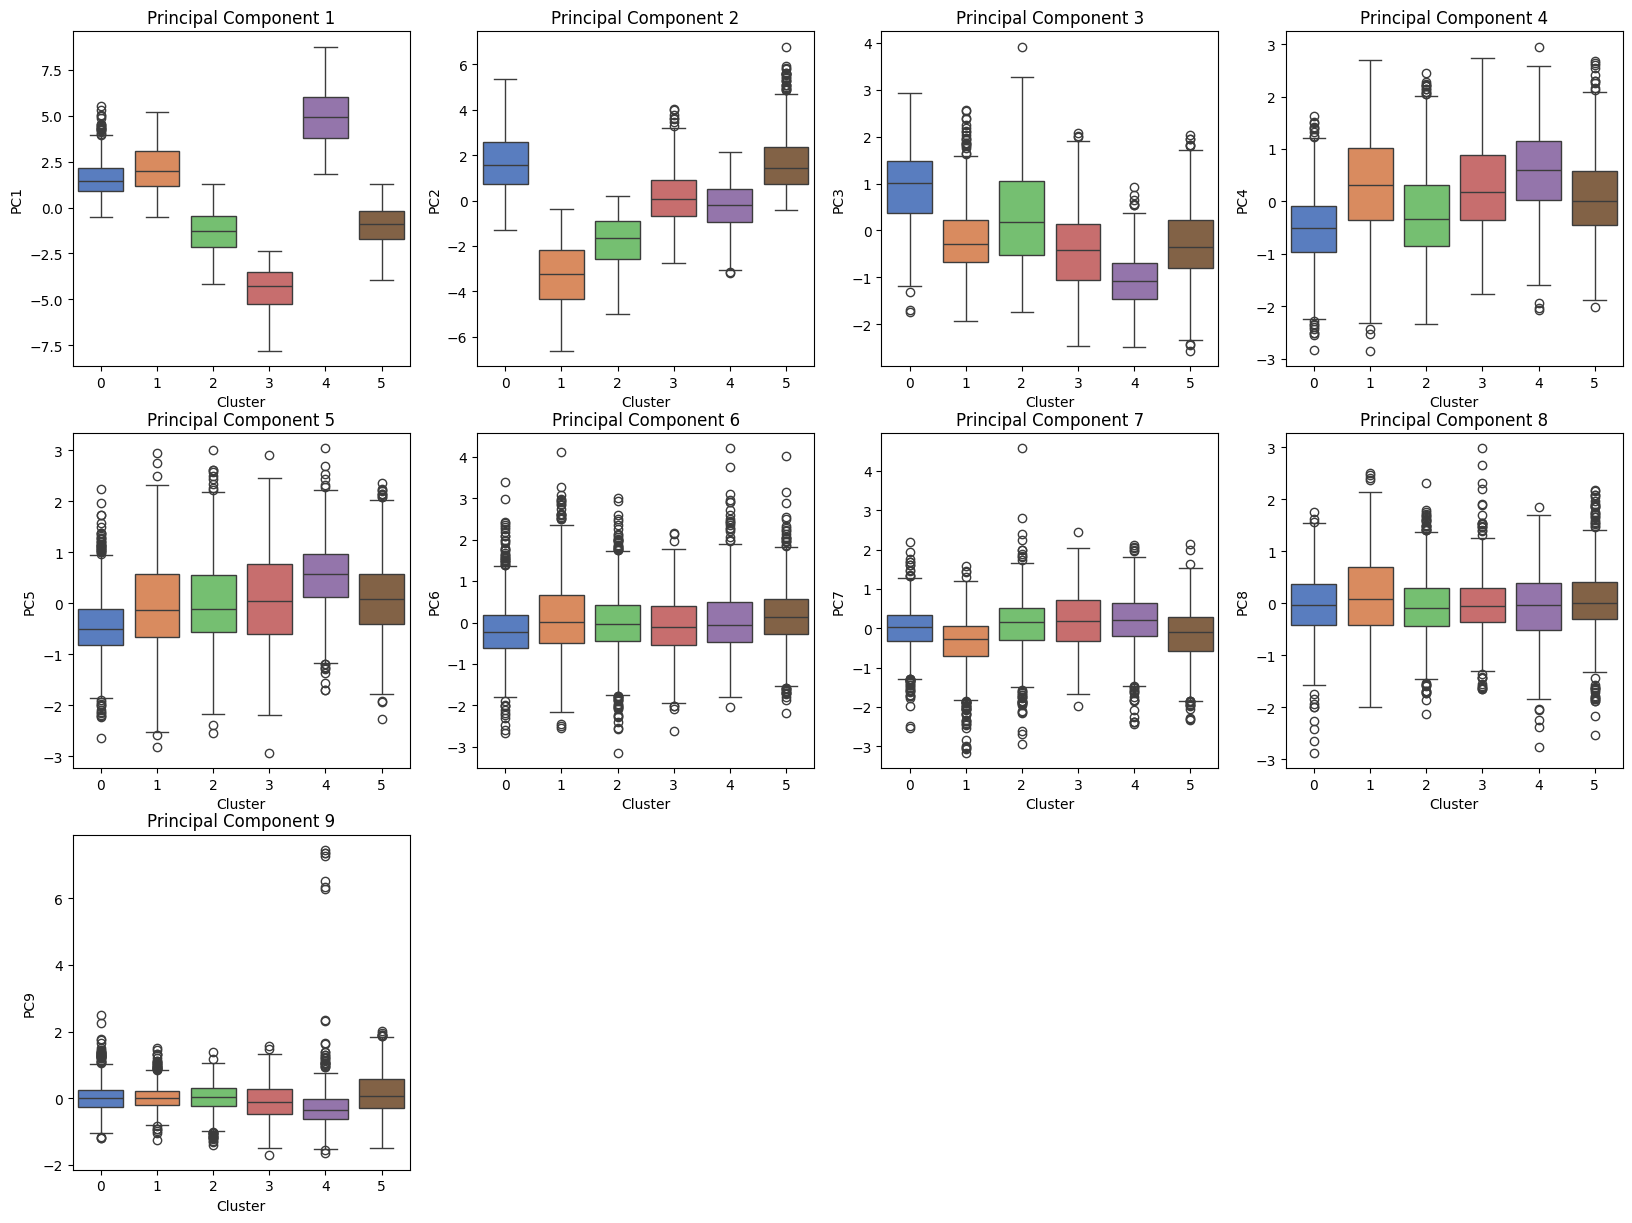

In [35]:
#boxplot for each cluster for all 9 components
plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_new, x='Cluster', y=f'PC{i}', palette='muted')
    plt.title(f'Principal Component {i}')
    
plt.show()

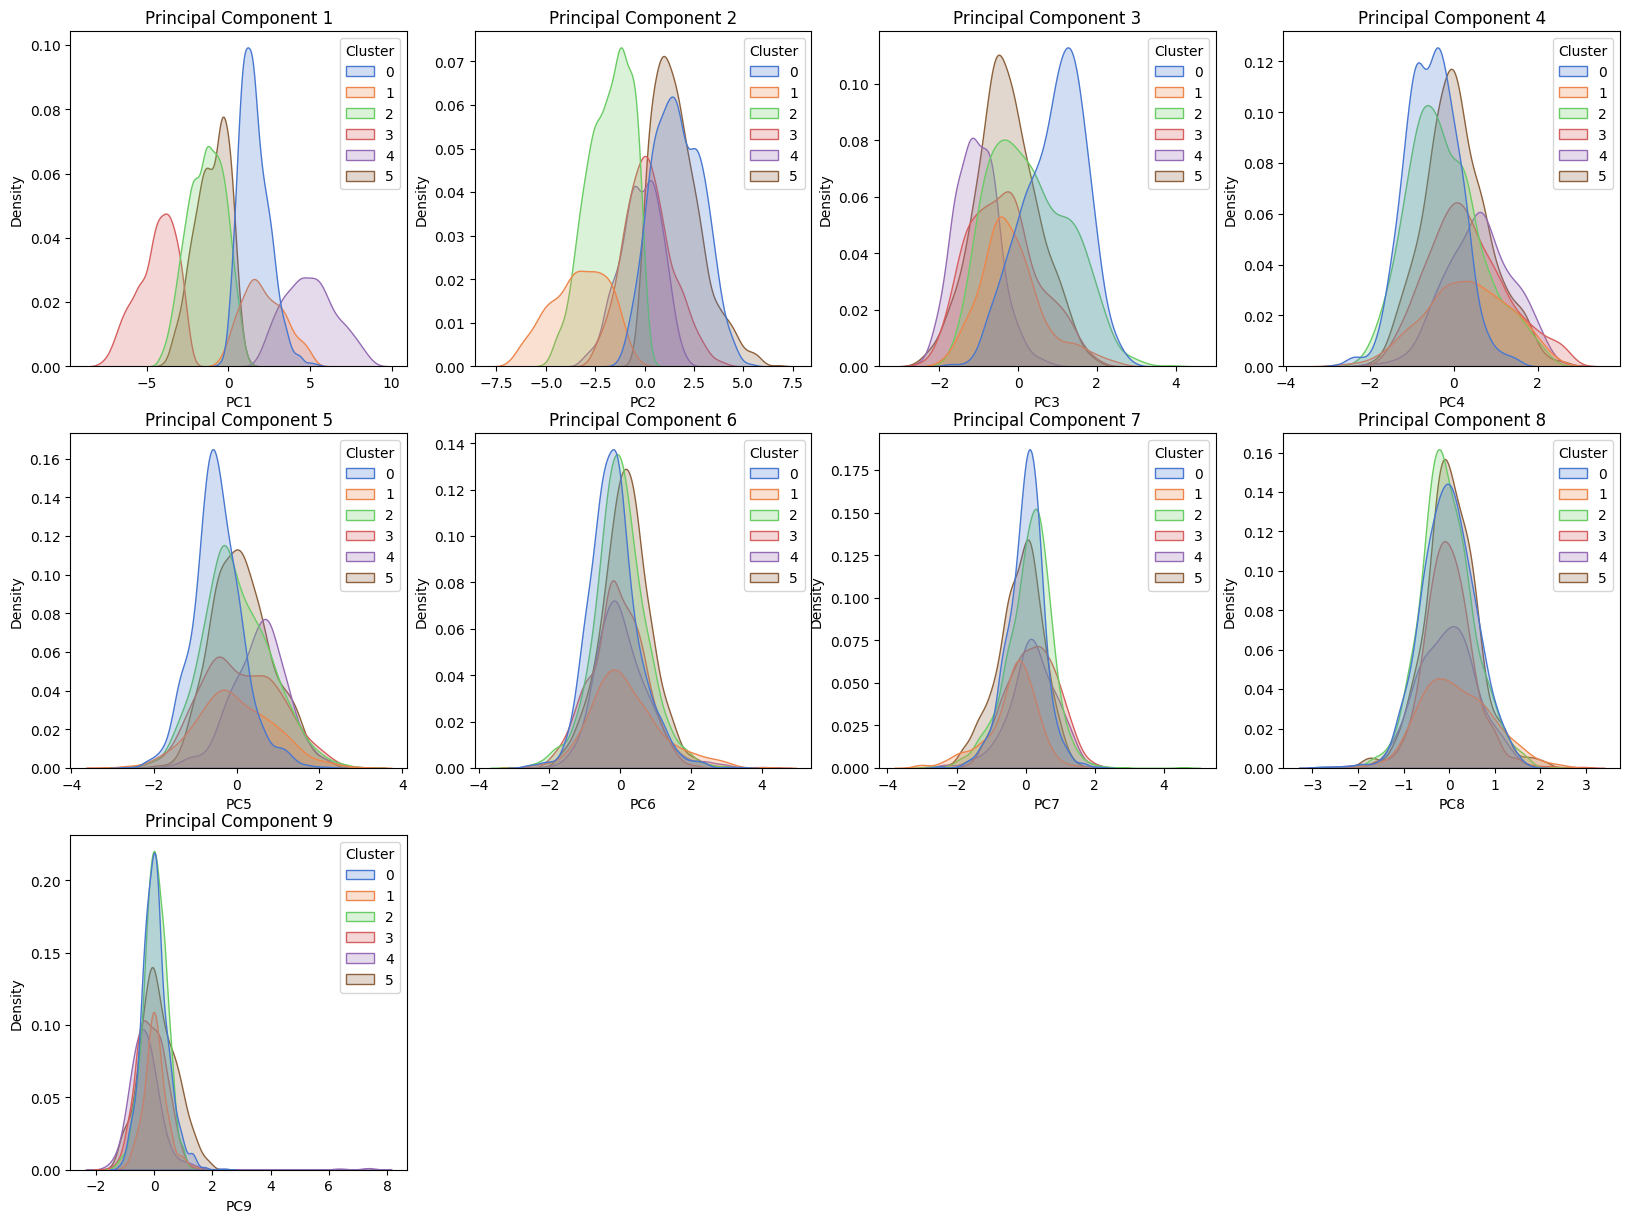

In [36]:
# plot all components in each cluster to see the distribution

plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(4, 4, i)
    sns.kdeplot(data=df_new, x=f'PC{i}', hue='Cluster', palette='muted', fill=True)
    plt.title(f'Principal Component {i}')
    
plt.show()

In [37]:
X_new = df_new.drop(['Bankrupt?', 'Cluster'], axis=1)
y_new = df_new['Bankrupt?']
Cluster = df_new['Cluster']

# 3 Training Model 1: Stacking Method

The subgroup of clusters I worked on were cluster groups 2 and 3. For the first step of creating a stacking method, I predicted the group cluster IDs 2 and 3 from section 2 the company will likely belong to using logistic regression. Logistic regression is known for its simplicity, and efficiency for binary classification tasks. 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# filter data for clusters 2 and 3
clusters_2_3 = df_new[df_new['Cluster'].isin([2, 3])]

X_clusters = clusters_2_3 .drop(['Bankrupt?', 'Cluster'], axis=1)
y_clusters = clusters_2_3 ['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X_clusters, y_clusters, test_size=0.3, random_state=42)

clf_group = LogisticRegression(max_iter=1000)
clf_group.fit(X_train, y_train)

y_pred = clf_group.predict(X_test)

In [39]:
print("Accuracy of group prediction model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of group prediction model: 1.0
Confusion Matrix:
 [[377   0]
 [  0 257]]


In [40]:
importance = clf_group.coef_[0]
top_features = sorted(zip(importance, X_clusters.columns), reverse=True)[:5]
print("Top 5 important features:", [feature for _, feature in top_features])

Top 5 important features: ['PC2', 'PC4', 'PC7', 'PC5', 'PC9']


For the second step, I classified whether the company will file for bankrupcy in the clusters 2 and 3 subgroup. The three base models I used were random forest, gradient boosting and extra trees. The meta model I used was logistic regression.

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import StackingClassifier

X_bankruptcy = clusters_2_3 .drop(['Bankrupt?', 'Cluster'], axis=1)
y_bankruptcy = clusters_2_3 ['Bankrupt?']

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

meta_model = LogisticRegression()

stack_clf = StackingClassifier(classifiers=[model for _, model in base_models], meta_classifier=meta_model, use_probas=True, average_probas=False)
stack_clf.fit(X_train, y_train)
y_pred_bankruptcy = stack_clf.predict(X_test)

In [42]:
print("Accuracy of stacked model:", accuracy_score(y_test, y_pred_bankruptcy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bankruptcy))

Accuracy of stacked model: 0.9921135646687698
Confusion Matrix:
 [[373   4]
 [  1 256]]


# 4 Train Model 2: k fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Configuration for the Logistic Regression model
clf_group = LogisticRegression(max_iter=1000)

# Applying 10-fold cross-validation
# 'accuracy' is the scoring metric to use
scores = cross_val_score(clf_group, X_clusters, y_clusters, cv=10, scoring='accuracy')

# Output the results
print("Cross-validation scores:", scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.99528302 1.         1.         1.         1.         0.99526066
 1.         1.         1.         1.        ]
Average cross-validation score: 1.00


Accordining to the accuracy scores and confusion matrices from all three models in sections 3 and 4, the first model was the best train model (100%). It will be used in step 5.

# 5 Generalization

Accordining to the accuracy scores and confusion matrices from all three models in sections 3 and 4, the first model was the best train model (100%). It will be used in step 5. I created a new model that used the entire dataset to predict the company's bankruptcy status using the test set. 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

X_full = df_new.drop(['Bankrupt?', 'Cluster'], axis=1)
y_full = df_new['Bankrupt?']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

clf_full = LogisticRegression(max_iter=1000)
clf_full.fit(X_train_full, y_train_full)

y_pred = clf_full.predict(X_test_full)


In [50]:
test_df = pd.read_csv('Cleaned_test.csv')
y_pred_test = clf_full.predict(test_df)
submission_df = pd.read_csv('submission.csv')
# Add predictions to the 'Bankrupt?' column
submission_df['Bankrupt?'] = y_pred_test
submission_df.to_csv('submission.csv', index=False)

In [51]:
print("Accuracy of group prediction model:", accuracy_score(y_test_full, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_full, y_pred))

Accuracy of group prediction model: 0.9655765920826161
Confusion Matrix:
 [[1670   11]
 [  49   13]]
